In [344]:
import pandas as pd
import numpy as np
import random

In [345]:
from sklearn.datasets import load_wine

In [346]:
wine = load_wine()
#print(wine.DESCR)

In [347]:
x = wine.data
y = wine.target

In [348]:
xdf = pd.DataFrame(x)
xdf.columns = wine.feature_names

In [349]:
xdf.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [350]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [351]:
def random_learning(svm_pipe1,x_train1,x_test1,y_train1,y_test1,acc_rand,n):
    for i in range(0,n): 
        #Model runs on train data stack
        svm_pipe.fit(x_train1,y_train1)
        
        #Model validated against test data stack & appended to the acc list
        acc_rand.append(svm_pipe.score(x_test1,y_test1))
        
        #Returns a random row for labelling
        #act_ix = np.argmin([max(i) for i in np.abs(svm.decision_function(x_test))])
        rand_ix = random.randint(0,len(x_test1)-1)
        
        #Take that vector and label it (irl: manually, here: from existing data)
        rand_vector = x_test1[rand_ix].reshape(1,13)
        rand_label = y_test1[rand_ix]
        
        #Update training data
        x_train1 = np.r_[x_train1,rand_vector]
        y_train1 = np.append(y_train1,rand_label)
        
        #Update testing data
        #x_test = np.delete(x_test,act_ix,0)
        #y_test = np.delete(y_test,act_ix)
        
        #print("iteration completed -> ",i,"... size of train ->",x_train.shape,"... size of test ->",x_test.shape)
        #Repeat n number of times
    return acc_rand

In [352]:
def active_learning(svm_pipe,x_train,x_test,y_train,y_test,acc_act,n):
    for i in range(0,n): 
        #Model runs on train data stack
        svm_pipe.fit(x_train,y_train)
        
        #Model validated against test data stack & appended to the acc list
        acc_act.append(svm_pipe.score(x_test,y_test))
        
        #Detect which sample needs to be labelled (uncertainity based on distance from hyperplane)
        act_ix = np.argmin([max(i) for i in np.abs(svm.decision_function(x_test))])
        
        #Take that vector and label it (irl: manually, here: from existing data)
        act_vector = x_test[act_ix].reshape(1,13)
        act_label = y_test[act_ix]
        
        #Update training data
        x_train = np.r_[x_train,act_vector]
        y_train = np.append(y_train,act_label)
        
        #Update testing data
        #x_test = np.delete(x_test,act_ix,0)
        #y_test = np.delete(y_test,act_ix)
        
        #print("iteration completed -> ",i,"... size of train ->",x_train.shape,"... size of test ->",x_test.shape)
        #Repeat n number of times
    return acc_act

In [353]:
x_train.shape

(7, 13)

In [354]:
#Base model pipeline
svm = LinearSVC()
svm_pipe = make_pipeline(svm)
svm_pipe.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('linearsvc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [355]:
#Inputs to active learning & random learning function
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.96,random_state=42)
acc_act = []
acc_rand = []
n = 100

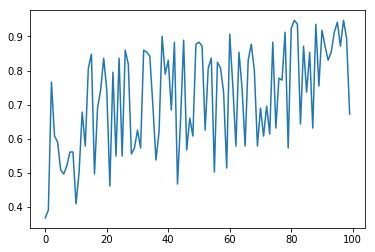

In [356]:
#Calling active learning function and random learning function
plt.plot(active_learning(svm_pipe,x_train,x_test,y_train,y_test,acc_act,n))

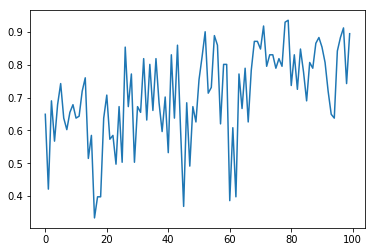

In [357]:
plt.plot(random_learning(svm_pipe,x_train,x_test,y_train,y_test,acc_rand,n))